# 1.Introduction
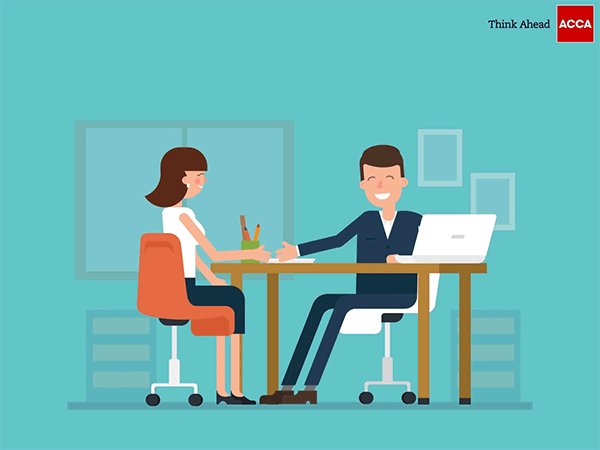
Campus recruitment is a strategy for **sourcing, engaging and hiring young talent for internship and entry-level positions**. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates.

**Context of our Dataset:** Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

# Goals
There are two primary goals of this kernel.

* Do a **exploratory analysis** of the Recruitment dataset
* Do an **visualization analysis** of the Recruitment dataset

# 3. Importing libraries and exploring Data
## 3a.Importing Libraries
Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

## 3b.Extracting dataset

In [2]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv("/kaggle/input/brain-dead-placement-data/Placement_Data_Full_Class.csv")

## 3c. Examining the dataset

In [3]:
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Inference**
* We have **Gender and Educational qualification** data
* We have all the **educational performance(score)** data
* We have the **status** of placement and salary details
* We can expect **null values in salary** as candidates who weren't placed would have no salary
* **Status** of placement is our target variable rest of them are independent variable except salary

In [4]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


We have **215 candidate details** and there are mixed datatypes in each column. We have few missing values in the salary column as expected since those are the people who didn't get hired

In [5]:
#Looking at the datatypes of each factor
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

We have **1 integer,5 float and 8 object** datatypes in our dataset

## 3d.Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean and simple. Lets analyze and see what we have here.

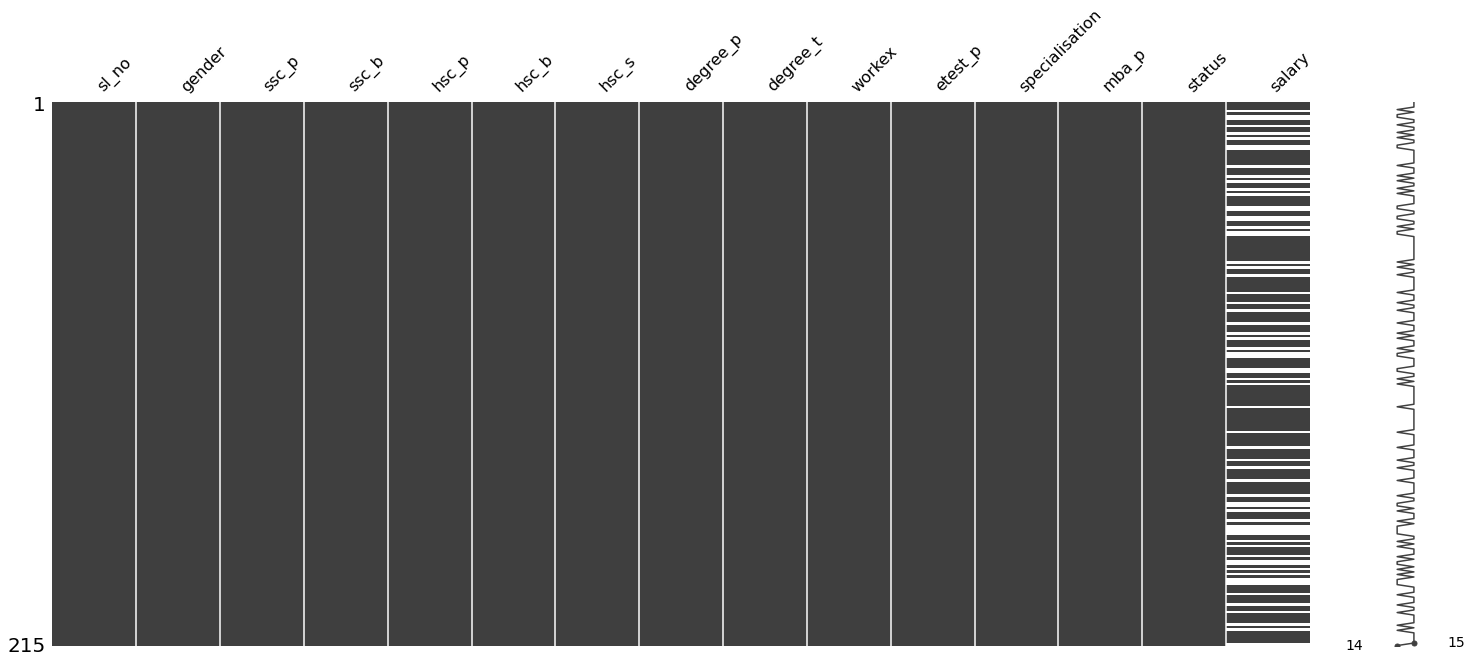

In [6]:
import missingno as msno 
msno.matrix(placement)

As per our inference, we can visualize the null values in salary. Let's see the count

In [7]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


**Inference**
* There are **67 null values** in our data, which means 67 unhired candidates. 
* We can't drop these values as this will provide a valuable information on why candidates failed to get hired.
* We can't impute it with mean/median values and it will go against the context of this dataset and it will show unhired candidates got salary.
* Our best way to deal with these null values is to **impute it with '0'** which shows they don't have any income

# 4. Data Cleaning

## 4a. Handling mis_ing values
First lets focus on the missing data in review features,if we drop the rows which has null values we might sabotage some potential information from the dataset. So we have to impute values into the NaN records which leads us to accurate models. Since it is a salary feature,it is best to impute the records with '0' for unhired candidates

In [8]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


Yayy ! we have cleared that Salary **with zero null values**. Now it's time to drop unwanted features !

In [9]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


We have dropped **serial number** as we have index as default and we have **dropped the boards of school education** as I believe it doesn't matter for recruitment

## 4b. ....... Outliers
Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. In our case, **let's first visualize our data and decide on what to do with the outliers**

Text(0.5, 1.0, 'Employability percentage')

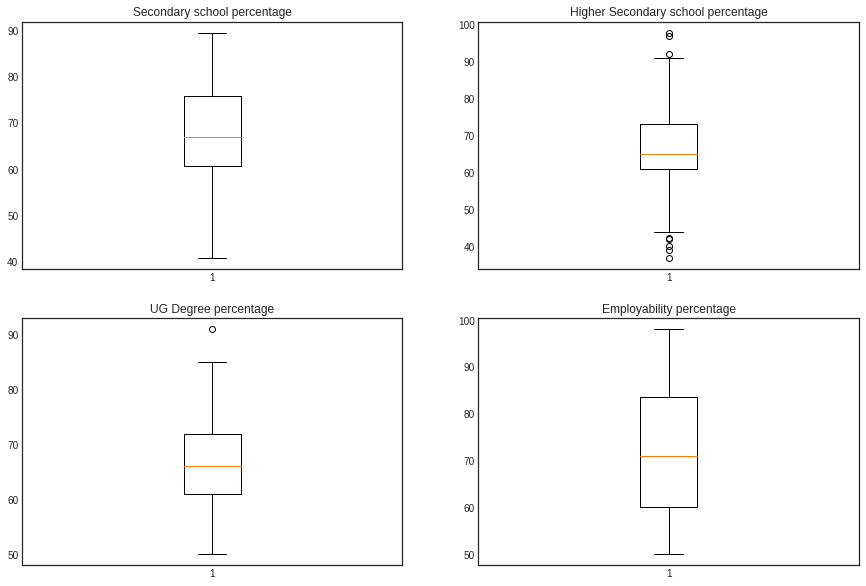

In [10]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

As you see, we have very less number of outliers in our features. Especially we have majority of the outliers in **hsc percentage** Let's clear em up!

In [11]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

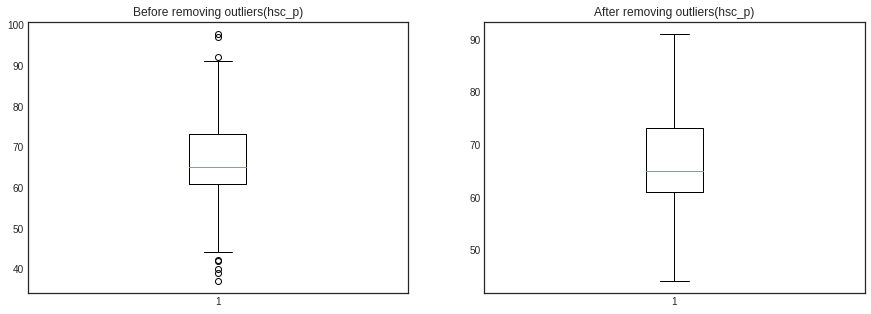

In [12]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

Voalá! We have removed the outliers

# 5.Data Visualizations
## 5a. Count of categorical features- Count plot

[Text(0, 0, 'Placed'), Text(0, 0, 'Not Placed')]

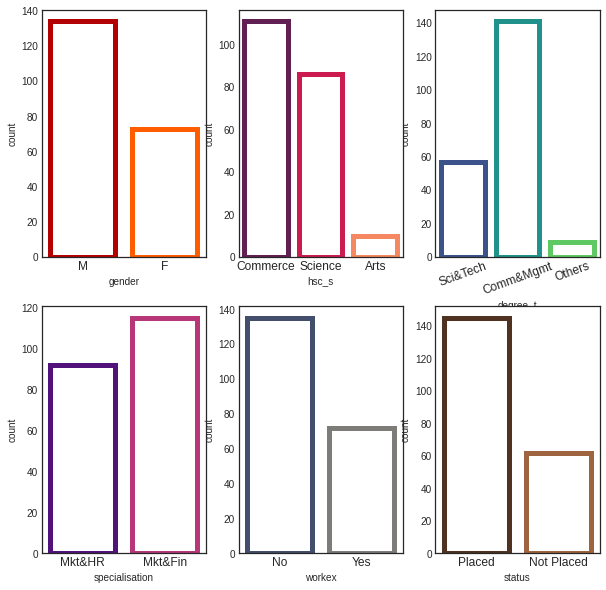

In [13]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

**Inference**
* We have **more male candidates** than female
* We have candidates who did **commerce** as their hsc course and as well as undergrad
* **Science background** candidates are the second highest in both the cases
* Candidates from **Marketing and Finance** dual specialization are high 
* Most of our candidates from our dataset **don't have any work experience**
* Most of our candidates from our dataset **got placed** in a company

## 5b. Distribution Salary- Placed Students

[Text(0.5, 0, '')]

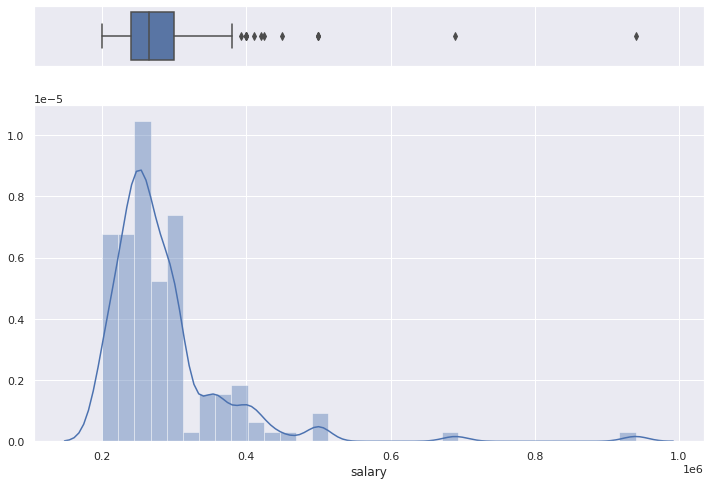

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


**Inference**
* Many candidates who got placed received package between **2L-4L PA**
* Only **one** candidate got around **10L PA**
* The **average** of the salary is a little more than 2LPA


## 5c. Employability score vs Salary- Joint plot

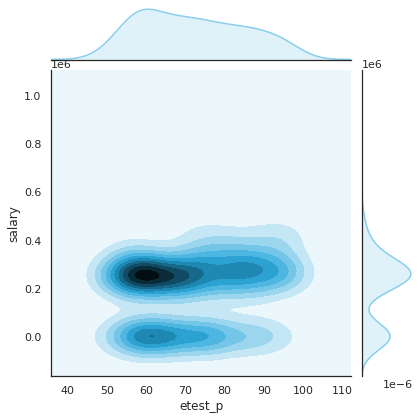

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=placement_filtered["etest_p"], y=placement_filtered["salary"], kind='kde', color="skyblue")

**Inference**
* Most of the candidates scored around **60 percentage** got a decent package of **around 3 lakhs PA**
* **Not** many candidates received salary **more than 4 lakhs PA**
* The bottom dense part shows the candidates who were **not placed**

## 5d.Distribution of all percentages

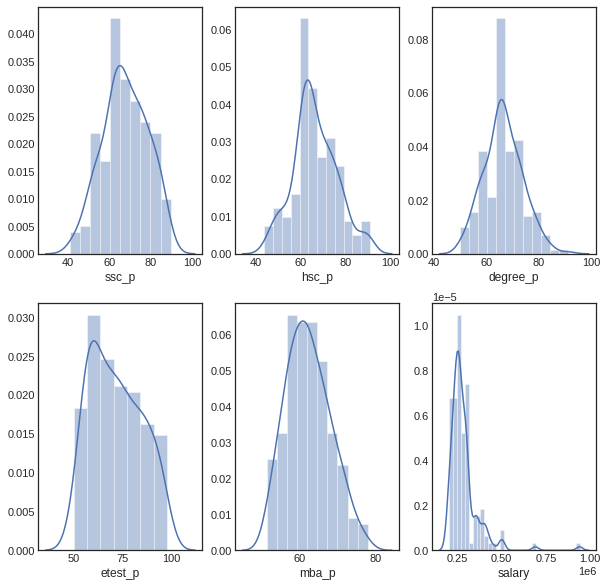

In [16]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Inference**
* All the distributions follow **normal distribution** except salary feature
* Most of the candidates **educational performances are between 60-80%**
* **Salary distribution got outliers** where few have got salary of 7.5L and 10L PA

## 5e.Work experience Vs Placement Status

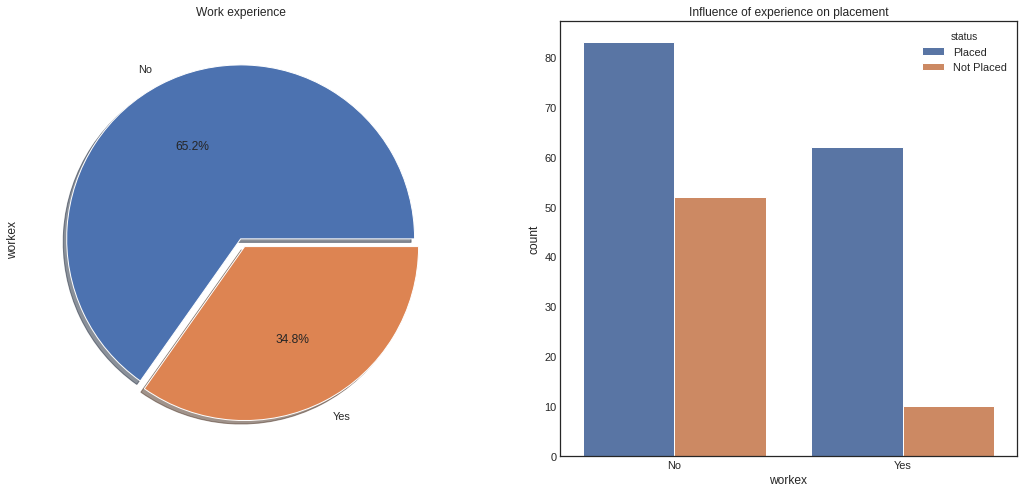

In [17]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

**Inference**
* We have nearly **66.2%** of candidates who never had any work experience
* Candidates who **never had work experience** have **got hired** more than the ones who had experience
* We can conclude that **work experience doesn't influence** a candidate in the recruitment process

## 5f. MBA marks vs Placement Status- Does your academic score influence?

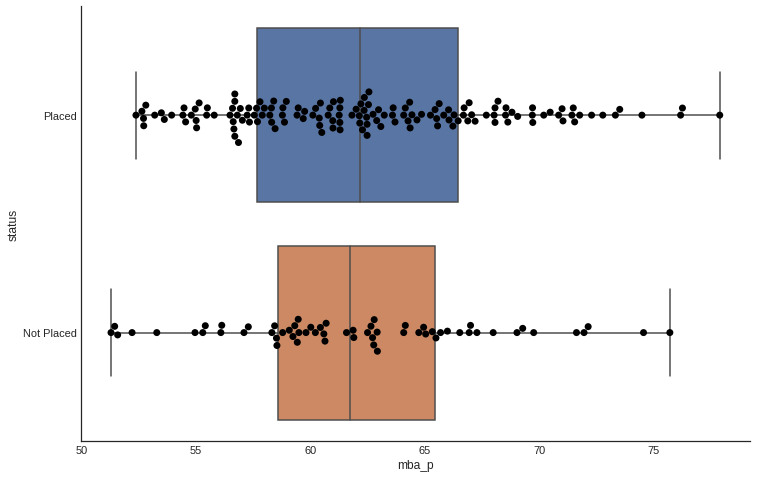

In [18]:
g = sns.boxplot(y = "status",x = 'mba_p',data = placement_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

**Inference** <br>
Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand when it comes to numbers as you can see in the swarm. So as per the plot,percentage do influence the placement status

## 5g.Does MBA percentage and Employability score correlate?

In [19]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(placement_filtered,x="mba_p",y="etest_p",color="status",facet_col="workex")

**Inference**
* There is **no relation** between mba percentage and employability test
* There are many candidates who **haven't got place**d when they don't have work experience
* Most of the candidates who performed better in both tests **have got placed**

## 5g.Does Work experience  and Status correlate?

In [20]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(placement_filtered,y="etest_p",x="status",color="workex")

**Inference**
* There is **relation** between workex and status.
* There are many candidates who **had similar e_test score** but did not get placed when they don't have work experience
* Most of the candidates who had work experience **have got placed**

## 5h. Is there any gender bias while offering remuneration?

In [21]:
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

**Inference**
* The **top salaries were given to male**
* The **average salary** offered were also **higher for male**
* **More male candidates were placed** compared to female candidates


## 5i. Coorelation between academic percentages

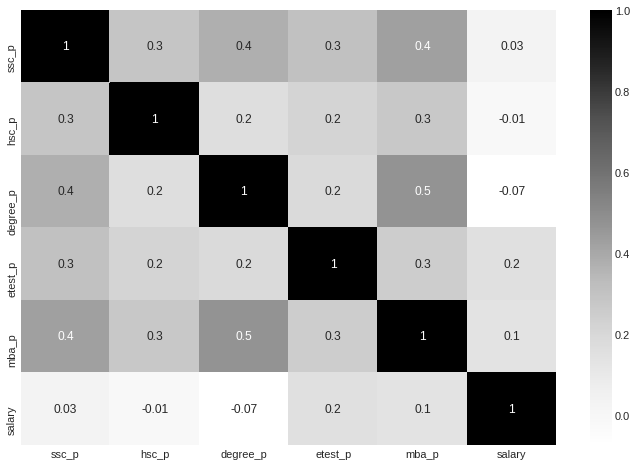

In [22]:
sns.heatmap(placement_placed.corr(),annot=True,fmt='.1g',cmap='Greys')

**Inference**
* Candidates who were good in their academics performed well throughout school,undergrad,mba and even employability test
* These percentages **don't have any influence over their salary**

## 5j.Distribution of our data

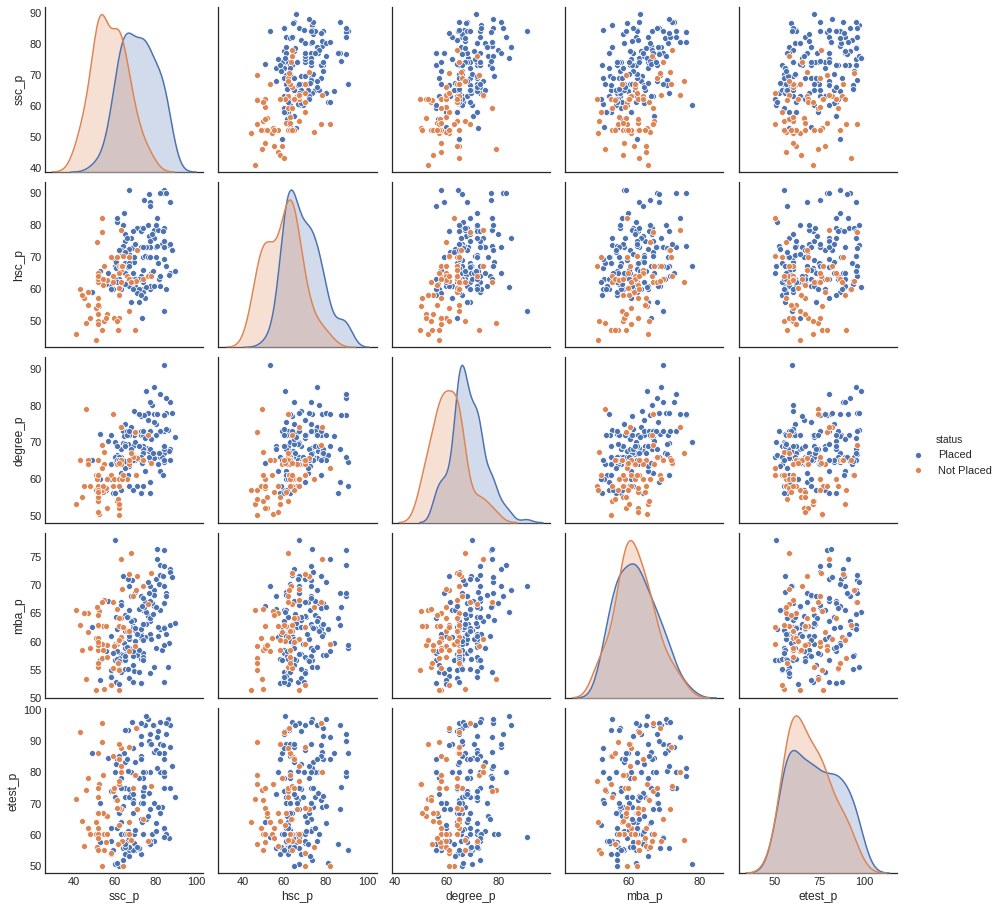

In [24]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

**Inference**
* Candidates who has **high score in higher secondary and undergrad got placed**
* Whomever got **high scores in their schools got placed**
* Comparing the number of students who got placed candidates who got **good mba percentage and employability percentage**  

# Report Summary
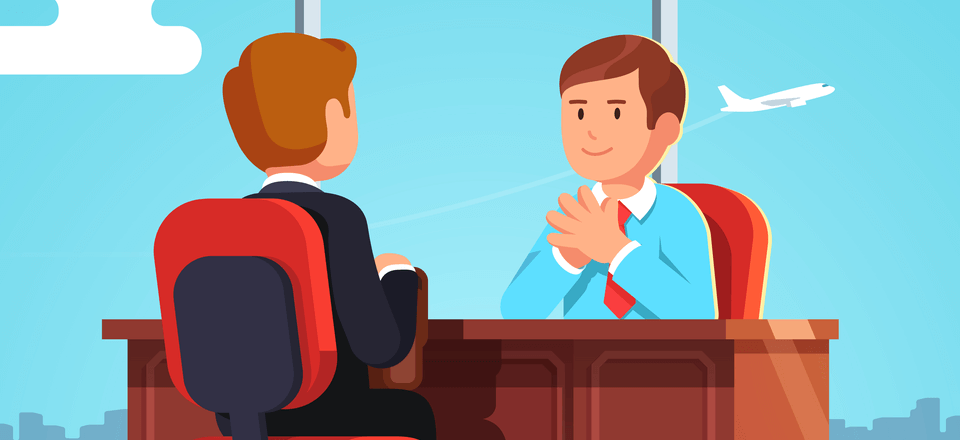
From the analysis report on Campus Recruitment dataset here are my following conclusions

* **Educational percentages** are highly influential for a candidate to get placed
* **Past work experience** doesn't influence much on your masters final placements
* There are **no gender discrimination** while hiring, but higher packages were given to male
* Academic percentages have **no relation** towards salary package.
